In [10]:
from google.colab import drive
drive.mount ('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
cd /content/drive/MyDrive/NewDeepLearning/SimpleConvNet

/content/drive/MyDrive/NewDeepLearning/SimpleConvNet


epoch:0, train acc:0.2976, test acc:0.301
epoch:1, train acc:0.8488, test acc:0.818
epoch:2, train acc:0.901, test acc:0.877
epoch:3, train acc:0.9254, test acc:0.903
epoch:4, train acc:0.934, test acc:0.904
epoch:5, train acc:0.9454, test acc:0.92
epoch:6, train acc:0.9644, test acc:0.938
epoch:7, train acc:0.9626, test acc:0.938
epoch:8, train acc:0.9684, test acc:0.937
epoch:9, train acc:0.9764, test acc:0.946
epoch:10, train acc:0.9792, test acc:0.955
epoch:11, train acc:0.983, test acc:0.959
epoch:12, train acc:0.9826, test acc:0.957
epoch:13, train acc:0.9878, test acc:0.96
epoch:14, train acc:0.985, test acc:0.966
epoch:15, train acc:0.9918, test acc:0.962
epoch:16, train acc:0.9924, test acc:0.961
epoch:17, train acc:0.9952, test acc:0.963
epoch:18, train acc:0.9898, test acc:0.949
epoch:19, train acc:0.996, test acc:0.962


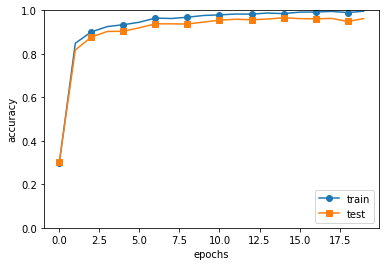

In [4]:
# coding: utf-8
import numpy as np
import matplotlib.pyplot as plt
from mnist import load_mnist
from simple_convnet import SimpleConvNet
from optimizer import *


# 0:Load MNIST data
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=False)

x_train, t_train = x_train[:5000], t_train[:5000]
x_test, t_test = x_test[:1000], t_test[:1000]

# 1:Settings
network = SimpleConvNet(input_dim=(1,28,28),
                        conv_param = {'filter_num': 30, 'filter_size': 5, 'pad': 0, 'stride': 1},
                        hidden_size=100, output_size=10, weight_init_std=0.01)
optimizer = Adam()   #SGD(lr=0.01)
max_epochs = 20
train_size = x_train.shape[0]
batch_size = 100
iter_per_epoch = max(train_size / batch_size, 1)
max_iter = int(max_epochs * iter_per_epoch)

train_loss_list = []
train_acc_list = []
test_acc_list = []

epoch_cnt = 0

for i in range(max_iter):
    batch_mask = np.random.choice(train_size, batch_size).get()
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(np.asarray(x_batch), np.asarray(t_batch))
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(np.asarray(x_train), np.asarray(t_train))
        test_acc = network.accuracy(np.asarray(x_test), np.asarray(t_test))
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


# Plot
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x.get(), np.asarray(train_acc_list).get(), marker='o', label='train', markevery=2)
plt.plot(x.get(), np.asarray(test_acc_list).get(), marker='s', label='test', markevery=2)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()